1. Select a dataset - any dataset! Make sure it's not too dirty,as this case study is about storytelling, not cleaning... :)
2. Pick your audience: non-technical; and adjust your tone accordingly.
3. Take a look at the data : explore it.
4. Think of a narrative,and pursue it.
5. Givea 15 mins presentation to your mentor during your next call.

In [97]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# create the dataframe
income = pd.read_csv('adult.csv')
income.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


From a brief review of the data we notice that there is missing data indicated by a question mark, which should be replaced by nan.

In [3]:
# checking the data types
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# checking the data shape (rows and columns)
income.shape

(48842, 15)

In [6]:
# checking for null values
income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# checking for '?'
income.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

We seem to have 3 columns consisting of data marked with '?'. We will replace it with nan.

In [10]:
income['workclass'] = income['workclass'].replace('?', np.nan)
income['occupation'] = income['occupation'].replace('?', np.nan)
income['native-country'] = income['native-country'].replace('?', np.nan)

In [13]:
income.dropna(inplace=True)

In [14]:
income.shape

(45222, 15)

In [18]:
# checking for duplicate values
income[income.duplicated()].shape

(47, 15)

In [23]:
income= income.drop_duplicates()
income.shape

(45175, 15)

In [22]:
# Let's check the columns and identify if we have to keep/reduce 
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Questions we will direct to this particular dataset:
- Identify the total count of income >50k and visualize it (barplot)
- Univariate Analysis (occupation and income) and visualize it (scatterplot)

In [58]:
# print the total number of people who make more than 50K
len(income[income['income'] == '>50K'])

11202

<=50K    0.752031
>50K     0.247969
Name: income, dtype: float64


/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


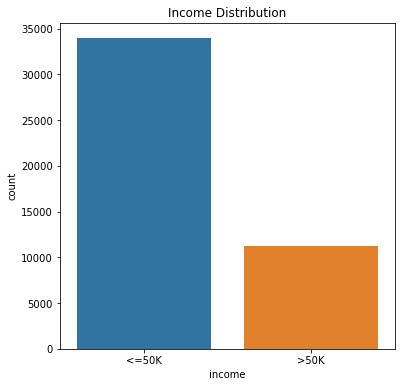

In [40]:
# Visualize income distribution
print(income['income'].value_counts(normalize = True))

plt.figure(figsize=(6,6))
ab = sns.countplot(income['income']) 

plt.title("Income Distribution")
plt.show()

The barplot illustrates that there are 3 times more people who make 50K or less, compared to the ones who make more than 50k

We want to perform bivariate analysis to better understand how is the income related with occupation, age and education.

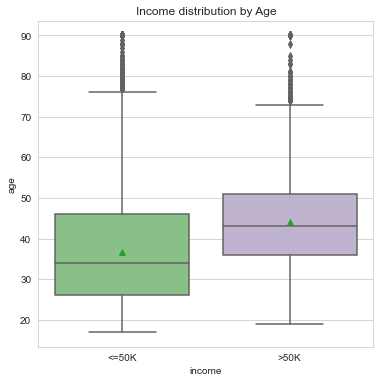

In [60]:
fig = plt.figure(figsize = (6,6))
sns.set_style("whitegrid")
sns.boxplot(x = 'income', y = 'age', data = income, palette = "Accent", showmeans=True).set_title("Income distribution by Age")
plt.show()

In [61]:
# print the age median for the income category
print(income.loc[income['income'] == '<=50K', 'age'].median())
print(income.loc[income['income'] == '>50K', 'age'].median())

34.0
43.0


The boxplot shows that the median age for people making more than 50k is 43 years old. 

<Figure size 1440x576 with 0 Axes>

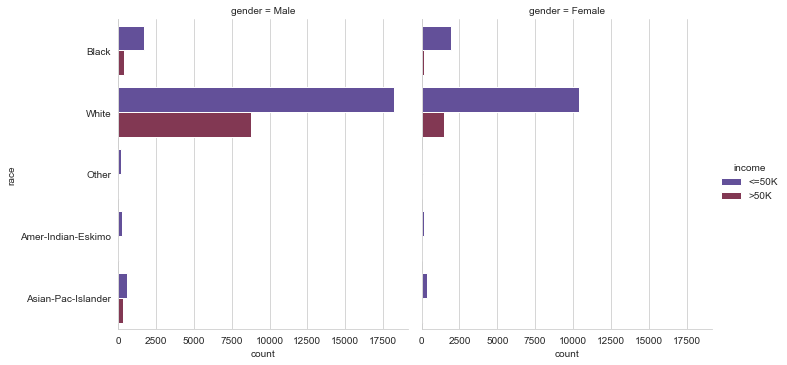

In [64]:
# Distribution of Income by Race and Gender
plt.figure(figsize = (20, 8))
sns.catplot(y = 'race', hue = 'income', col = 'gender', data = income, kind = 'count', palette = 'twilight')
plt.show()

The catplot shows the frequencies of the distribution of income by race and gender. We can view a dominance of male gender making more than 50K, compared to female gender.

<Figure size 1440x576 with 0 Axes>

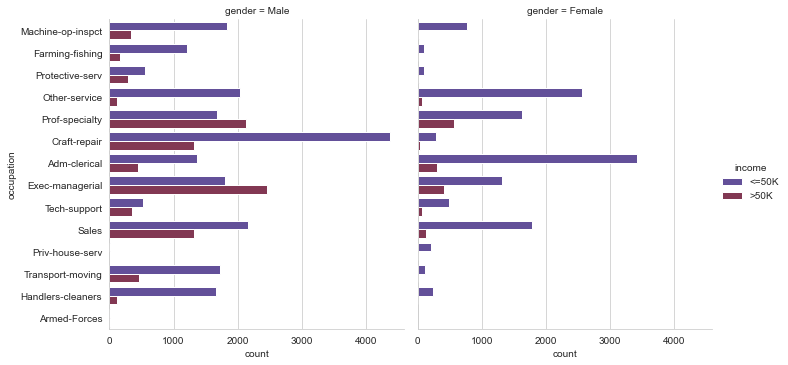

In [69]:
# Income by Occupation and Gender
plt.figure(figsize = (20, 8))

sns.catplot(y = 'occupation', hue = 'income', col = 'gender', data = income, kind = 'count', palette = 'twilight')
plt.show()

Here we can view the income distribituion by gender and occupation. The executive managerial role has the highest income for man, and proffessional spectialty role has the highest income for women.

<Figure size 576x576 with 0 Axes>

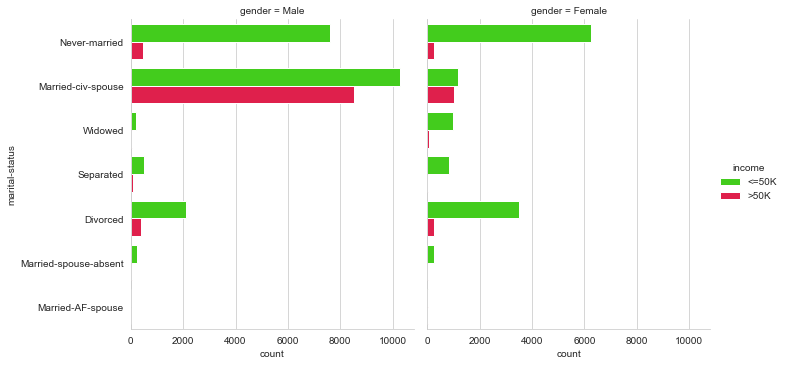

In [71]:
# Income by Marital Status and Gender
plt.figure(figsize = (8,8))
sns.catplot(y = 'marital-status', hue = 'income', col = 'gender', data = income, palette = 'prism', kind = 'count')

This figure illustrates the income distribution based on gender and their marital status. For both genders making more than 50K,the marital status is 'Married-civ-spouse'. This does differ for the group making 50K or less, where we see that highest number of men making less 50K are 'maried-civ-spouse', whereas the highest number of women making 50K or less are 'never-married'.

In [105]:
income['income'].replace({'<=50K':0,'>50K':1}, inplace=True)
income['gender'].replace({'Female':0,'Male':1}, inplace=True)
income['education'].replace({'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3,
                                              '9th': 4, '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8,
                                              'Some-college': 9, 'Assoc-voc': 10, 'Assoc-acdm': 11,
                                              'Bachelors': 12, 'Masters': 13, 'Doctorate': 14, 'Prof-school': 15}, inplace=True)
income['marital-status'].replace({'Never-married': 0, 'Separated': 1, 'Divorced': 2,
                                                        'Widowed': 3, 'Married-spouse-absent': 4, 'Married-civ-spouse': 5,
                                                        'Married-AF-spouse': 6}, inplace=True)
income['occupation'].replace({'Other-service': 0, 'Craft-repair': 1, 'Priv-house-serv': 2,
                                                'Handlers-cleaners': 3, 'Farming-fishing': 4, 'Adm-clerical': 5,
                                                'Transport-moving': 6, 'Machine-op-inspct': 7, 'Sales': 8, 'Armed-Forces': 9,
                                                'Tech-support': 10, 'Protective-serv': 11, 'Exec-managerial': 12,
                                                'Prof-specialty': 13}, inplace=True)
income['race'].replace({'Other': 0, 'Amer-Indian-Eskimo': 1, 'Asian-Pac-Islander': 2, 'Black': 3,
                                    'White': 4}, inplace=True)
income['workclass'].replace({'Without-pay': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2,
                                              'Local-gov': 3, 'State-gov': 4, 'Federal-gov': 5, 'Private': 6}, inplace=True)


In [106]:
income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,6,226802,6,7,0,7,Own-child,3,1,0,0,40,United-States,0
1,38,6,89814,8,9,5,4,Husband,4,1,0,0,50,United-States,0
2,28,3,336951,11,12,5,11,Husband,4,1,0,0,40,United-States,1
3,44,6,160323,9,10,5,7,Husband,3,1,7688,0,40,United-States,1
4,18,?,103497,9,10,0,?,Own-child,4,0,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,6,257302,11,12,5,10,Wife,4,0,0,0,38,United-States,0
48838,40,6,154374,8,9,5,7,Husband,4,1,0,0,40,United-States,1
48839,58,6,151910,8,9,3,5,Unmarried,4,0,0,0,40,United-States,0
48840,22,6,201490,8,9,0,5,Own-child,4,1,0,0,20,United-States,0


In [92]:
#income.drop(['educational-num','relationship', 'capital-gain', 'capital-loss','native-country'], axis=1,inplace=True)

In [93]:
#income.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender', 'hours-per-week', 'income'],
      dtype='object')

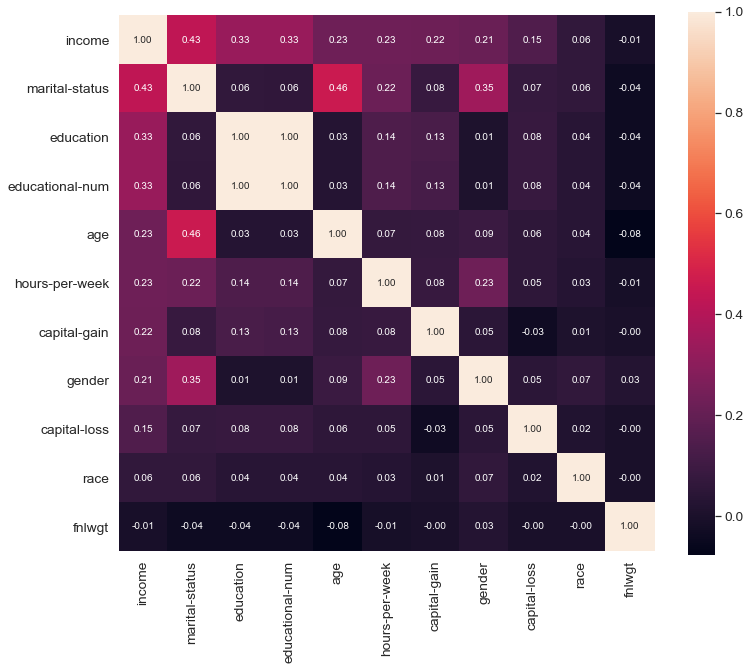

In [108]:
# We would like to see the variable correlation 
corr_matrix = income.corr()

f, ax = plt.subplots(figsize = (12,10))
k = 12 ##The number of variables to be used for the heatmap
cols = corr_matrix.nlargest(k, 'income')['income'].index ##The 'income' variable is used as index as it is compared against others
cm = np.corrcoef(income[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
                yticklabels = cols.values, xticklabels = cols.values) ##annot prints the values inside the matrix

plt.show()

Here we can see the correlation between the variables which can be weak or strong, and this heatmap shows that income is correlated the closest with the marital status. (hypothesis)

Futher investigations we can do is to actually verify if income varies on the marital status or is there any other feature which effects the income directly.